# **Activity:**    Assignment 8.1 : Saving Models

# **Name:**    Raven Charles Roy P. Jacinto

# **Course and Section:**    CPE019 - CPE32S3

# **Date of Submission:**    April 19, 2024

# **Instructor:**    Engr. Roman Richard



## **Instructions:**

1.) Choose any dataset applicable to either a classification problem or a regression problem.

2.) Explain your datasets and the problem being addressed.

3.)  Show evidence that you can do the following:
- Save a model in HDF5 format
- Save a model and load the model in a JSON format
- Save a model and load the model in a YAML format

- Checkpoint Neural Network Model Improvements
- Checkpoint Best Neural Network Model only

- Load a saved Neural Network model
- Visualize Model Training History in Keras
- Show the application of Dropout Regularization
- Show the application of Dropout on the visible layer
- Show the application of Dropout on the hidden layer
- Show the application of a time-based learning rate schedule
- Show the application of a drop-based learning rate schedule


In [ ]:
pip install h5py

In [ ]:
import pandas as pd
import numpy
import os
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_yaml


## **Upon looking for regression dataset at UCI Machine Learning Repository, I found this, however, it does not have python import so I am not able to fetch this one. Therefore, I manually utilize this dataset through pandas.**

## **Dataset explanation and the problem being addressed:**

#### This dataset pertains to a localization system or algorithm used mostly to better calculate positioning systems. It contain variables namely anchor_ratio, trans_range, node_density, iterations, average localization error or ALE, and standard deviation of ALE sd_ALE.

#### It is crucial to assess the performance of localization systems in various scenarios like in robotics, GPS tracking, or indoor positioning systems that is why we need to predict its average locaclization error, to better evaluate and improve the accuracy and reliability of localization systems and enhance their effectiveness in real-world applications.

#### This machine learning model aims to develop a regression model that accurately predicts Average Localization Error based on the selected features.

# **Pre-processing**

In [ ]:
df = pd.read_csv("/content/mcs_ds_edited_iter_shuffled.csv")

In [ ]:
df.shape

(107, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anchor_ratio  107 non-null    int64  
 1   trans_range   107 non-null    int64  
 2   node_density  107 non-null    int64  
 3   iterations    107 non-null    int64  
 4   ale           107 non-null    float64
 5   sd_ale        107 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 5.1 KB


In [ ]:
df.isnull().sum()

anchor_ratio    0
trans_range     0
node_density    0
iterations      0
ale             0
sd_ale          0
dtype: int64

In [ ]:
df.head()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943


In [ ]:
df.dtypes

anchor_ratio      int64
trans_range       int64
node_density      int64
iterations        int64
ale             float64
sd_ale          float64
dtype: object

In [ ]:
df.drop(columns=['sd_ale'])

,anchor_ratio,trans_range,node_density,iterations,ale
0,30,15,200,40,0.773546
1,15,15,100,70,0.911941
2,30,15,100,50,0.814867
3,15,20,100,20,1.435332
4,30,15,100,40,1.265909
...,...,...,...,...,...
102,18,23,100,20,1.287472
103,14,17,200,60,0.899102
104,15,20,100,50,1.171140
105,20,20,100,40,1.234493


### **I dropped the sd_ale column since it was just a computation of standard deviation of computed ALE, which is not the focus of this prediction model.**

# **Creation of neural network model & Saving Model in HDF5, JSON, and YAML format**

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(34)

# Assigning input variables and target variable
X = df.drop(columns=["ale"])
y = df["ale"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=34)


# Scaling the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, verbose=0)

# Evaluating the model using MSE and MAE
y_pred_nn = model.predict(X_test_scaled).flatten()  # Flatten the predictions
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Mean Squared Error (Neural Network):", mse_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print("Mean Absolute Error (Neural Network):", mae_nn)

# serialize weights to HDF5
model.save_weights("model.h5")

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
print("Model is saved to disk in HDF5, JSON, and YAML format")

2/2 [==============================] - 0s 6ms/step
Mean Squared Error (Neural Network): 0.12831850175328713
Mean Absolute Error (Neural Network): 0.2706830960018282
Model is saved to disk in HDF5, JSON, and YAML format


In [ ]:
#Saving model architecture to single file
model.save("my_model.keras")
print("Saved model to disk")

Saved model to disk


### This just for saving the entire model in my google colab directory so that I have a backup.

# **Loading model in JSON and YAML format**

In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load JSON and create model
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)
print("Model.json loaded from disk")


# Evaluating the model using MSE and MAE
y_pred_nn = model.predict(X_test_scaled).flatten()  # Flatten the predictions
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Mean Squared Error (Neural Network):", mse_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print("Mean Absolute Error (Neural Network):", mae_nn)

Model.json loaded from disk
2/2 [==============================] - 0s 7ms/step
Mean Squared Error (Neural Network): 0.12831850175328713
Mean Absolute Error (Neural Network): 0.2706830960018282


In [ ]:
# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)

# Load YAML and create model
with open('model.yaml', 'r') as yaml_file:
    loaded_model_yaml = yaml_file.read()

loaded_model = model_from_json(loaded_model_yaml)
print("Model.yaml loaded from disk")

# evaluate loaded model on test data
# Evaluating the model using MSE and MAE
y_pred_nn = model.predict(X_test_scaled).flatten()  # Flatten the predictions
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Mean Squared Error (Neural Network):", mse_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print("Mean Absolute Error (Neural Network):", mae_nn)

Model.yaml loaded from disk
2/2 [==============================] - 0s 6ms/step
Mean Squared Error (Neural Network): 0.12831850175328713
Mean Absolute Error (Neural Network): 0.2706830960018282


# **Results:**

## **Model Saved in HDF5, JSON, YAML format**


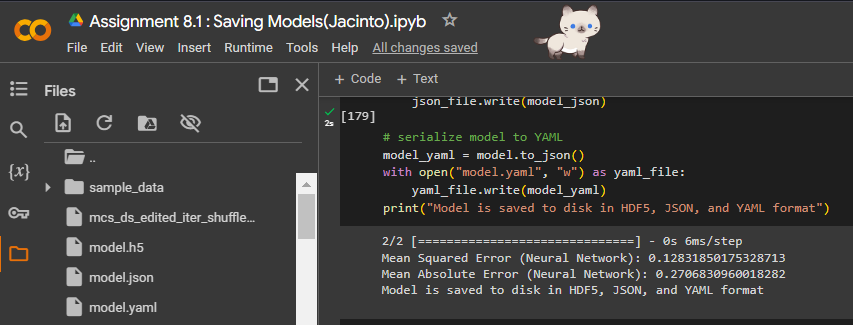

In [ ]:
import json

# Read the contents of the JSON file
with open('model.json', 'r') as json_file:
    model_json_content = json_file.read()

# Parse the JSON content
parsed_model_json = json.loads(model_json_content)

# Print the parsed JSON content with indentation
print(json.dumps(parsed_model_json, indent=4))

{
    "class_name": "Sequential",
    "config": {
        "name": "sequential_98",
        "layers": [
            {
                "module": "keras.layers",
                "class_name": "InputLayer",
                "config": {
                    "batch_input_shape": [
                        null,
                        5
                    ],
                    "dtype": "float32",
                    "sparse": false,
                    "ragged": false,
                    "name": "dense_295_input"
                },
                "registered_name": null
            },
            {
                "module": "keras.layers",
                "class_name": "Dense",
                "config": {
                    "name": "dense_295",
                    "trainable": true,
                    "dtype": "float32",
                    "batch_input_shape": [
                        null,
                        5
                    ],
                    "units": 32,
               

In [ ]:
import yaml

# Read the contents of the YAML file
with open('model.yaml', 'r') as yaml_file:
    model_yaml_content = yaml_file.read()

# Parse the YAML content
parsed_model_yaml = yaml.safe_load(model_yaml_content)

# Print the parsed YAML content with indentation
print(yaml.dump(parsed_model_yaml, indent=4))


backend: tensorflow
class_name: Sequential
config:
    layers:
    -   class_name: InputLayer
        config:
            batch_input_shape:
            - null
            - 5
            dtype: float32
            name: dense_295_input
            ragged: false
            sparse: false
        module: keras.layers
        registered_name: null
    -   build_config:
            input_shape:
            - null
            - 5
        class_name: Dense
        config:
            activation: relu
            activity_regularizer: null
            batch_input_shape:
            - null
            - 5
            bias_constraint: null
            bias_initializer:
                class_name: Zeros
                config: {}
                module: keras.initializers
                registered_name: null
            bias_regularizer: null
            dtype: float32
            kernel_constraint: null
            kernel_initializer:
                class_name: GlorotUniform
                

## **Loaded both in a JSON and YAML format**

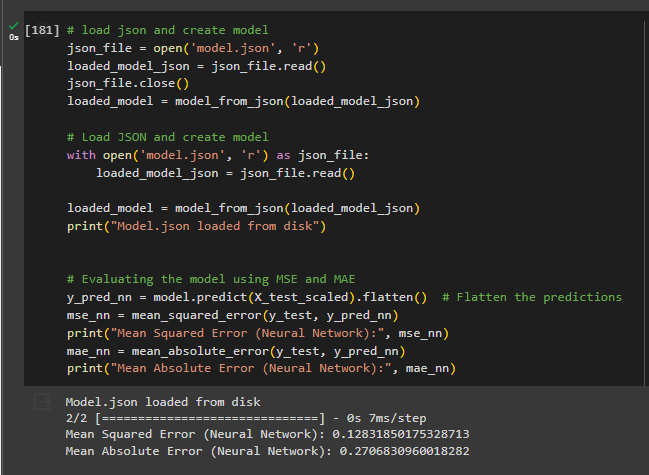

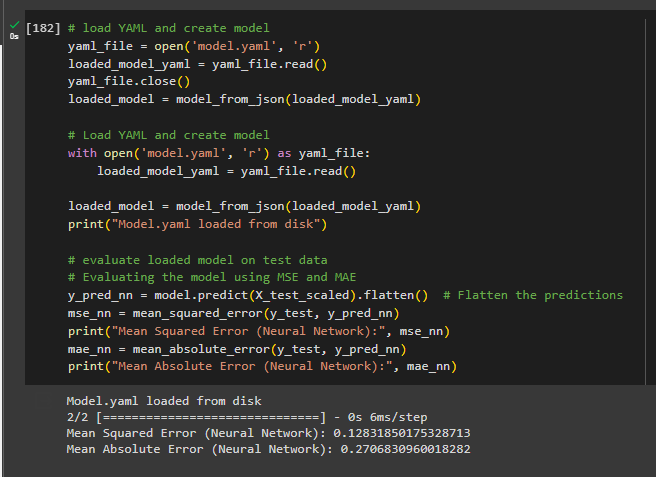

# **Checkpoint Neural Network Model Improvements**

In [ ]:
# Checkpoint the weights when validation loss improves
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
seed = 34
tf.random.set_seed(seed)

# Checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.2f}.keras"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X_test_scaled, y_test, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: loss improved from inf to 0.10799, saving model to weights-improvement-01-0.11.keras

Epoch 2: loss improved from 0.10799 to 0.10122, saving model to weights-improvement-02-0.10.keras

Epoch 3: loss improved from 0.10122 to 0.09514, saving model to weights-improvement-03-0.10.keras

Epoch 4: loss improved from 0.09514 to 0.08706, saving model to weights-improvement-04-0.09.keras

Epoch 5: loss improved from 0.08706 to 0.07975, saving model to weights-improvement-05-0.08.keras

Epoch 6: loss improved from 0.07975 to 0.07434, saving model to weights-improvement-06-0.07.keras

Epoch 7: loss improved from 0.07434 to 0.06995, saving model to weights-improvement-07-0.07.keras

Epoch 8: loss improved from 0.06995 to 0.06616, saving model to weights-improvement-08-0.07.keras

Epoch 9: loss improved from 0.06616 to 0.06281, saving model to weights-improvement-09-0.06.keras

Epoch 10: loss improved from 0.06281 to 0.05952, saving model to weights-improvement-10-0.06.keras

Epoch 11: lo

## **Checkpoint Evaluation:**  The process involved training a model to learn from the provided data over 150 epochs of training. Through checkpointing, training appears successful, as the loss consistently decreases over the epochs, indicating that the model is learning and improving its performance. However, there are instances where the loss does not improve or only marginally improves, which is normal during the training process. Overall, the model seems to be converging well, achieving a low final loss value, which suggests it may perform effectively for its intended task.

## Also, I encountered a warning that instead of using .hdf5 in the filepath, I should use .keras since the current installed library and packages works best if I used .keras instead of .hdf5

# **Checkpoint Best Neural Network Model Only**

In [ ]:
# Checkpoint
filepath="weights.best.keras"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# Fit the model
model.fit(X_test_scaled, y_test, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: loss improved from inf to 0.00130, saving model to weights.best.keras

Epoch 2: loss did not improve from 0.00130

Epoch 3: loss did not improve from 0.00130

Epoch 4: loss did not improve from 0.00130

Epoch 5: loss improved from 0.00130 to 0.00126, saving model to weights.best.keras

Epoch 6: loss improved from 0.00126 to 0.00124, saving model to weights.best.keras

Epoch 7: loss improved from 0.00124 to 0.00120, saving model to weights.best.keras

Epoch 8: loss improved from 0.00120 to 0.00119, saving model to weights.best.keras

Epoch 9: loss improved from 0.00119 to 0.00111, saving model to weights.best.keras

Epoch 10: loss improved from 0.00111 to 0.00107, saving model to weights.best.keras

Epoch 11: loss improved from 0.00107 to 0.00106, saving model to weights.best.keras

Epoch 12: loss improved from 0.00106 to 0.00102, saving model to weights.best.keras

Epoch 13: loss improved from 0.00102 to 0.00101, saving model to weights.best.keras

Epoch 14: loss improved fro

## **Checkpoint Best Neural Network Only Evaluation:** Initially, the loss rapidly decreased, indicating improvement, and the model consistently saved its weights during epochs where loss decreased significantly. However, after around epoch 50, the rate of improvement slowed, with intermittent periods of stagnation or minimal progress. Despite this, the model continued to refine its performance, ultimately achieving a significantly lower loss by the end of training. Although there were instances where the loss did not improve, the overall trend indicates successful training with gradual optimization. As a result of this, the epoch that has the lowest loss was recorded or saved as weights.best.keras file.

# **Load a saved Neural Network model**

In [ ]:
# Load weights
model.load_weights("/content/weights.best.keras")
print("Loaded weights from file")

# Evaluation
loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)


Loaded weights from file
2/2 [==============================] - 0s 6ms/step - loss: 0.0223
Test Loss: 0.022301092743873596


# **Visualize Model Training History in Keras**

In [ ]:
# Fit the model and capture the training history
history = model.fit(X_train_scaled, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# Printing the keys of the history object
print(history.history.keys())


dict_keys(['loss', 'val_loss'])


## **Evaluation:** This is just for knowing what measurement you have used in your model. In this case, it uses loss with val_loss as it is intended for a regression problem.

dict_keys(['loss', 'val_loss'])


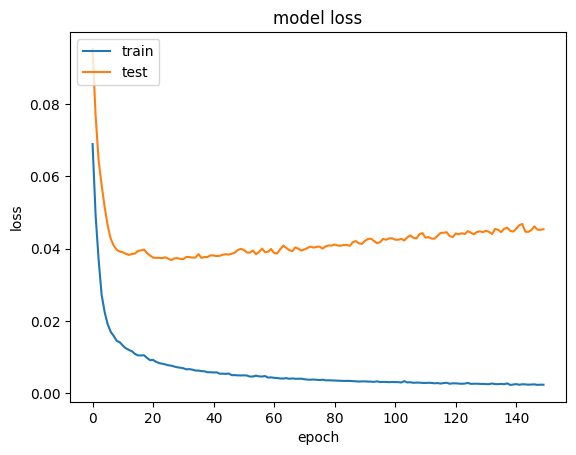

In [ ]:
# Listing all data in history
print(history.history.keys())

# Summarizing history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Model training history plot evaluation:** As we can see the testing loss goes on top of training loss which means that the model is not yet giving best performance and needs some regularization and tuning. This is because the model also captures the noise or random fluctuations in the training data rather than the underlying patterns. This can be solved using regularization like dropout and through hyperparemeter tuning.

# **Show the application of Dropout Regularization**


### **Show the application of Dropout on the visible layer**


2/2 [==============================] - 0s 5ms/step
Mean Squared Error (Neural Network): 0.08404378430144857
Mean Absolute Error (Neural Network): 0.19792606941311278


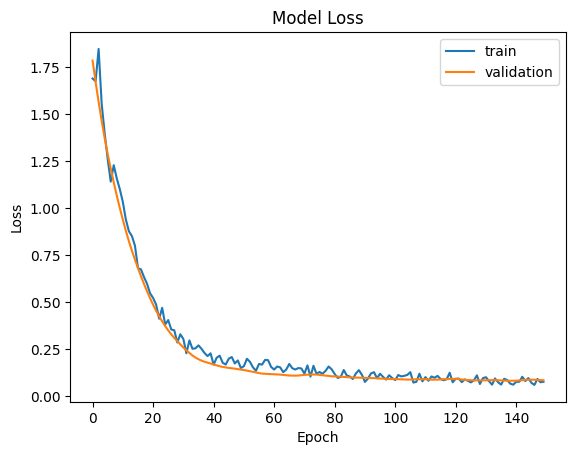

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import random

seed = 34
random.seed(seed)

# Building the neural network model with dropout regularization
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),  # Adding dropout in visible layer with a rate of 0.5 or 50%
    Dense(16, activation='relu'),
    Dense(1)
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model and capturing training history
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=150, batch_size=32, verbose=0)

# Evaluating the model using MSE and MAE
y_pred_nn = model.predict(X_test_scaled).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Mean Squared Error (Neural Network):", mse_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print("Mean Absolute Error (Neural Network):", mae_nn)

# Plotting the training and validation loss curves
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Evaluation:** After trying different dropout values for visible layer, I came up using 0.5 or 50% since it gives the best performance in which my testing loss is close to the training loss. Meaning that the dropout regularization in visible layer handles the outliers in my the data very well which leads to better performance of the model.


# **Show the application of Dropout on the hidden layer**

2/2 [==============================] - 0s 7ms/step
Mean Squared Error (Neural Network): 0.08425812743541199
Mean Absolute Error (Neural Network): 0.19870172452378984


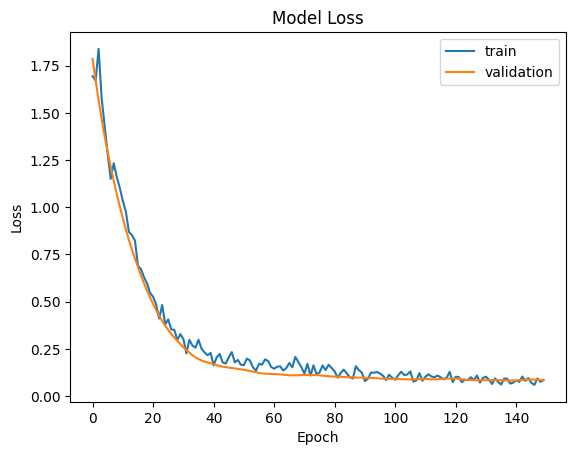

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import random

seed = 34
random.seed(seed)

# Building the neural network model with dropout regularization
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.01),
    Dense(1)
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model and capturing training history
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=150, batch_size=32, verbose=0)

# Evaluating the model using MSE and MAE
y_pred_nn = model.predict(X_test_scaled).flatten()  # Flatten the predictions
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Mean Squared Error (Neural Network):", mse_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print("Mean Absolute Error (Neural Network):", mae_nn)

# Plotting the training and validation loss curves
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Evaluation:** Applying dropout regularization in the hidden layer of my model is slightly good since it handles outliers in the data when it comes to hidden layer, which suggest good practice when developing neural network. However, the best dropout rate I can do this model is 0.01 since when I increase the value, the loss of both training and testing is parting. Therefore, I decided to use 0.01 drop rate to avoid underfitting and overfitting in the model.

# **Show the application of a time-based learning rate schedule**



2/2 [==============================] - 0s 6ms/step
Mean Squared Error (Neural Network): 0.07463836398662126
Mean Absolute Error (Neural Network): 0.17419692732110964


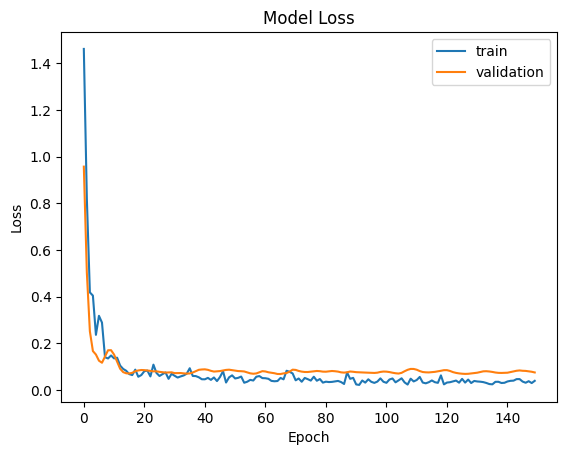

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
import random

seed = 34
random.seed(seed)

# Building the neural network model with dropout regularization
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.01),
    Dense(1)
])

# Define the learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.01
    decay_rate = 0.95
    decay_steps = 5
    lr = initial_lr * decay_rate ** (epoch / decay_steps)
    return lr

# Create a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model and capturing training history
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=150, batch_size=32, callbacks=[lr_scheduler], verbose=0)

# Evaluating the model using MSE and MAE
y_pred_nn = model.predict(X_test_scaled).flatten()  # Flatten the predictions
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Mean Squared Error (Neural Network):", mse_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print("Mean Absolute Error (Neural Network):", mae_nn)

# Plotting the training and validation loss curves
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **Time-based Learning Rate Schedule Evaluation:** Through the application of time-based learning rate schedule, I managed to slightly minimize the MSE and MAE of this neural network model due to the help of this time-based learning rate scheduler in managing convergence in my data. This is better in my case since I can easily adjust all its paramenters to achieve the desired output. Applying this made my model a little bit better. However, the testing loss in the middle and at the end is slightly higher than the training loss. This is mainly because the scheduler works on training, which improved data convergence and minimize the loss during the training.

# **Show the application of a drop-based learning rate schedule**

2/2 [==============================] - 0s 7ms/step
Mean Squared Error (Neural Network): 0.0753313804170493
Mean Absolute Error (Neural Network): 0.17461335363894467


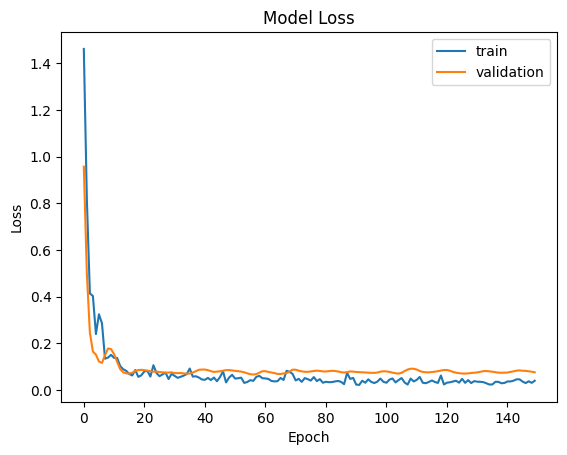

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
import random

# Define drop-based learning rate schedule function
def drop_lr_schedule(epoch):
    initial_lr = 0.01
    drop_rate = 0.9
    epochs_drop = 10
    lr = initial_lr * np.power(drop_rate, np.floor((1 + epoch) / epochs_drop))
    return lr

# Set random seed for reproducibility
seed = 34
random.seed(seed)

# Building the neural network model with dropout regularization
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.01),
    Dense(1)
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define drop-based learning rate scheduler callback
lr_scheduler = LearningRateScheduler(drop_lr_schedule)

# Training the model and capturing training history
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=150, batch_size=32, verbose=0, callbacks=[lr_scheduler])

# Evaluating the model using MSE and MAE
y_pred_nn = model.predict(X_test_scaled).flatten()  # Flatten the predictions
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Mean Squared Error (Neural Network):", mse_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print("Mean Absolute Error (Neural Network):", mae_nn)

# Plotting the training and validation loss curves
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **Drop-based Learning Rate Schedule Evaluation:** Through the application of time-based learning rate schedule, I managed to slightly minimize the MSE and MAE of this neural network model due to the help of it in managing convergence in my data. This is simpler to use however, this works inferior to time-based learning rate scheduler since I got slightly better results using that. Applying this made my model a little bit better. However, the testing loss in the middle and at the end is slightly higher than the training loss. This is mainly because the scheduler works on training, which improved data convergence and minimize the loss during the training.

# **CONCLUSION/LEARNINGS**


## In coclusion, I considered this activity as an application of everything we have discussed regarding neural network but this time, it also includes saving the model in different file like JSON, YAML, and HDF5. This activity really do enhanced my learning and knowledge when it comes to neural networks since we did the creation of neural network model using our own chosen dataset, save it, improved the model using dropout regularization, and learning rate scheduler to improve the performance of the model. It is not just about learning what neural networks are, it is also about how can you help the society using the knowledge that you have in developing nerual networks. I learned a lot from this activity and the more I engage in this challenging activities, the more I became better at it. This activity is quite difficult and time consuming but I know that it is totally worth it in the end.